## Homework 13

#### Danielle Tadych

The purpose of this script was to create a streamflow forecast for the semester 1 week, 2 week, and all semester long.  

My forecasting has varied week to week, but generally trending to simpler forecasts aside from the team forecast week.  Initially, I tried forecasting using an autoregression model of drought years.  I picked these drought years based on flows less than 60cfs in the semester (when I began trying to predict more seriously).  Correlating precipitation or change the model steps also did not help.

In the end, the most accurate weekly forecasts for me were to average the month's flows  to generate week and and then add the standard deviation for week 2.  The seasonal forecast I generated based on years where months were most similar to our flows.  For this week, I chose to use 2009 because it had the best fit for a regression model in a previous assignment.

### Setting up the environment

In [1]:
# Import the modules we will use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import os
import json
import urllib.request as req
import urllib
# from sklearn.linear_model import LinearRegression

In [2]:
# Set the file name and path to where you have stored the data
filename = 'streamflow_week13.txt'
filepath = os.path.join('../data', filename)
print(os.getcwd())
print(filepath)

# %%
# Read the data into a pandas dataframe
data = pd.read_table(filepath, sep='\t', skiprows=30,
                     names=['agency_cd', 'site_no',
                            'datetime', 'flow', 'code'],
                     parse_dates=['datetime'])

# Expand the dates to year month day
data['year'] = pd.DatetimeIndex(data['datetime']).year
data['month'] = pd.DatetimeIndex(data['datetime']).month
data['day'] = pd.DatetimeIndex(data['datetime']).dayofweek
data['dayofweek'] = pd.DatetimeIndex(data['datetime']).dayofweek

# Aggregate flow values to week and subset full dataset
flow_weekly = data.resample("W", on='datetime').mean()
observedweeklyflow = flow_weekly

/Users/danielletadych/Documents/FALL2020/Coding/homework-dtadych/Submissions
../data/streamflow_week13.txt


### Functions

In [3]:
def getflowyr(data_set, year):
    '----Get Flow for Year----'
    ' This function can create a pandas data frame filtered by year.'
    '--------------------------------------------------------------'
    'Variables'
    ' - Data_set: The flow dataset downloaded from USGS and made into a Pandas dataframe'
    ' - Year: year you need in the form yyyy'
    q = pd.DataFrame(data_set[data_set['year'] == year])
    print(q)
    return q


def getflowyrmo(data_set, year, month):
    '---- Get Flow for Year and Month ----'
    'Can create a pandas dataframe filtered by year and month.'
    '-------------------------------------'
    'Variables'
    ' - Data_set: The flow dataset downloaded from USGS and made into a Pandas dataframe'
    ' - Year: year you need in the form yyyy'
    ' - Month: Month you specify'
    q = pd.DataFrame(data_set[(data_set['year'] == year)
                              & (data_set['month'] == month)])
    print(q)
    return q


def getflowymw(data_set, year, month, week):
    '---- Get Flow for Year and Month ----'
    'Can create a pandas data frame filtered by year, month, and week'
    '-------------------------------------'
    'Variables'
    ' - Data_set: The flow dataset downloaded from USGS and made into a Pandas dataframe'
    ' - Year: year you need in the form yyyy'
    ' - Month: Month you specify'
    ' - Week: week you specify'
    q = pd.DataFrame(data_set[(data_set['year'] == year)
                              & (data_set['month'] == month)
                              & (data_set['weeknumber'] == week)])
    print(q)
    return q

## Actual Forecast

In [4]:
november = getflowyrmo(data, 2020, 11)

week1_forecast = np.mean(november['flow'].tail(2))
week2_forecast = week1_forecast + np.std(november['flow'])

# %%
# Seasonal Forecast

# Just going to use the last months of 2019 since it also
# is a record dry year
semestermonths = [8, 9, 10, 11, 12]
semester2009 = pd.DataFrame()

for i in semestermonths:
    semesterflow = getflowyrmo(observedweeklyflow, 2009, i)
    semester2009 = semester2009.append(semesterflow)

# %%
# Printing all the results
print()
print("Actual Forecast:")
print("Week 1: ", np.round(week1_forecast, decimals=2), "cfs")
print("Week 2: ", np.round(week2_forecast, decimals=2), "cfs")
print()
print("Seasonal Forecast:")
semester2009
# %%


      agency_cd  site_no   datetime   flow code  year  month  day  dayofweek
11627      USGS  9506000 2020-11-01  127.0    P  2020     11    6          6
11628      USGS  9506000 2020-11-02  125.0    P  2020     11    0          0
11629      USGS  9506000 2020-11-03  120.0    P  2020     11    1          1
11630      USGS  9506000 2020-11-04  124.0    P  2020     11    2          2
11631      USGS  9506000 2020-11-05  129.0    P  2020     11    3          3
11632      USGS  9506000 2020-11-06  130.0    P  2020     11    4          4
11633      USGS  9506000 2020-11-07  131.0    P  2020     11    5          5
11634      USGS  9506000 2020-11-08  138.0    P  2020     11    6          6
11635      USGS  9506000 2020-11-09  154.0    P  2020     11    0          0
11636      USGS  9506000 2020-11-10  156.0    P  2020     11    1          1
11637      USGS  9506000 2020-11-11  159.0    P  2020     11    2          2
11638      USGS  9506000 2020-11-12  160.0    P  2020     11    3          3

,site_no,flow,year,month,day,dayofweek
datetime,,,,,,
2009-08-09,9506000.0,37.700000,2009.0,8.0,3.0,3.0
2009-08-16,9506000.0,47.842857,2009.0,8.0,3.0,3.0
2009-08-23,9506000.0,46.942857,2009.0,8.0,3.0,3.0
2009-08-30,9506000.0,75.442857,2009.0,8.0,3.0,3.0
2009-09-13,9506000.0,182.285714,2009.0,9.0,3.0,3.0
2009-09-20,9506000.0,119.342857,2009.0,9.0,3.0,3.0
2009-09-27,9506000.0,102.271429,2009.0,9.0,3.0,3.0
2009-10-11,9506000.0,95.542857,2009.0,10.0,3.0,3.0
2009-10-18,9506000.0,102.485714,2009.0,10.0,3.0,3.0


## Plots

In the graphs below, you can compare 2009 semester flows with 2020.  Aside from the higher flows in the beginning of 2009, both are very similar.

              site_no       flow    year  month  day  dayofweek
datetime                                                       
2020-08-09  9506000.0  42.357143  2020.0    8.0  3.0        3.0
2020-08-16  9506000.0  35.000000  2020.0    8.0  3.0        3.0
2020-08-23  9506000.0  37.771429  2020.0    8.0  3.0        3.0
2020-08-30  9506000.0  54.085714  2020.0    8.0  3.0        3.0
              site_no       flow    year  month  day  dayofweek
datetime                                                       
2020-09-13  9506000.0  44.357143  2020.0    9.0  3.0        3.0
2020-09-20  9506000.0  57.971429  2020.0    9.0  3.0        3.0
2020-09-27  9506000.0  62.000000  2020.0    9.0  3.0        3.0
              site_no       flow    year  month  day  dayofweek
datetime                                                       
2020-10-11  9506000.0  67.771429  2020.0   10.0  3.0        3.0
2020-10-18  9506000.0  73.314286  2020.0   10.0  3.0        3.0
2020-10-25  9506000.0  83.128571  2020.0

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


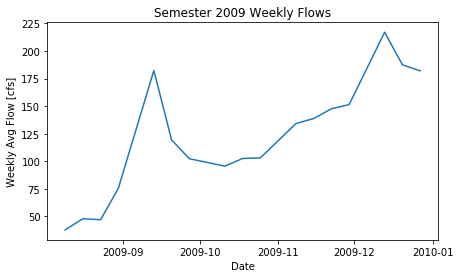

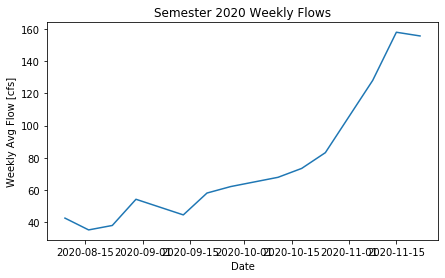

In [5]:
semester2020 = pd.DataFrame()

for i in semestermonths:
    semesterflow = getflowyrmo(observedweeklyflow, 2020, i)
    semester2020 = semester2020.append(semesterflow)    


fig, ax = plt.subplots()
ax.plot(semester2009['flow'], label='full')
ax.set(title="Semester 2009 Weekly Flows", xlabel="Date",
       ylabel="Weekly Avg Flow [cfs]")
fig.set_size_inches(7, 4)
    
fig, ax = plt.subplots()
ax.plot(semester2020['flow'], label='full')
ax.set(title="Semester 2020 Weekly Flows", xlabel="Date",
       ylabel="Weekly Avg Flow [cfs]")
fig.set_size_inches(7, 4)

## Map

The code below creates a map of the HUC 10 watershed.  An interesting observation from this map is the amount of groundwater wells upstream from the stream gauge, meaning groundwater pumping could cause lower streamflows during this year in addition to the low precipitation.

![Map of Camp Verde Watershed](CampVerdeWatershed_Tadych.png)

#### Note:
I have no idea why it is giving me an error because I'm in the right environment, but I'm already late so I had to cut my losses.  This code works in VS Code though

In [6]:
import geopandas as gpd
import fiona
from shapely.geometry import Point
import contextily as ctx


# %%
#  Gauges II USGS stream gauge dataset:
# Download here:
# https://water.usgs.gov/GIS/metadata/usgswrd/XML/gagesII_Sept2011.xml#stdorder

# Reading it using geopandas
file = os.path.join('../data', 'gagesII_9322_sept30_2011.shp')
gages = gpd.read_file(file)

# Zoom  in and just look at AZ
gages.columns
gages.STATE.unique()
gages_AZ = gages[gages['STATE'] == 'AZ']
gages_AZ.shape

# Watershed boundaries for the lower Colorado
file = os.path.join('../data', 'NHD_H_Arizona_State_GDB.gdb')
fiona.listlayers(file)
HUC10 = gpd.read_file(file, layer='WBDHU10')
HUC10.head()

# The Nature Conservatory datsets can be downloaded here:
# http://azconservation.org/downloads/category/gis
file = os.path.join('../data', 'az_hydro_routes.shp')
flowlines = gpd.read_file(file)

# %%
# Add point for stream gauge
# UA:  32.22877495, -110.97688412
# Stream gauge:  34.9455, -111.789167

point_list = np.array([[-111.789167, 34.448333]])

# Make these into spatial features
point_geom = [Point(xy) for xy in point_list]
point_geom

# make a dataframe of these points
point_df = gpd.GeoDataFrame(point_geom, columns=['geometry'],
                            crs=HUC10.crs)


# To fix this we need to re-project
points_project = point_df.to_crs(gages_AZ.crs)

# %%
# reprojecting streamflow
stream_project = flowlines.to_crs(gages_AZ.crs)
HUC10_project = HUC10.to_crs(gages_AZ.crs)

# Want to add one more layer for groundwater wells
# Groundwater well shape files can be downloaded here from ADWR:
# https://new.azwater.gov/gis
file = os.path.join('../data', 'GWSI_SITES.shp')
wells = gpd.read_file(file)
wells_project = wells.to_crs(gages_AZ.crs)

# Actual plotting

fig, ax = plt.subplots()
stream_project.plot(ax=ax, label="Flowlines", color='blue')
wells_project.plot(ax=ax, label="Groundwater Wells", color='green')
HUC10_project.boundary.plot(ax=ax, color=None,
                            edgecolor='black', linewidth=1,
                            label="HUC 10 Watershed Boundary")
points_project.plot(ax=ax, color='red', marker='*', label="Stream Gauge")
ax.set(title="VERDE RIVER NEAR CAMP VERDE, AZ", ylim=[1.36e6, 1.4e6],
       xlim=[-1.45e6, -1.395e6])
ax.legend()
ctx.add_basemap(ax)
fig.savefig("CampVerdeWatershed_Tadych.png")


ModuleNotFoundError: No module named 'geopandas'